In [110]:
from utils import *
from solvers import *
from problems import *
from solvers_milan import *

import utils, solvers, problems

GRID_SIZE = 10

%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Paper, Steps

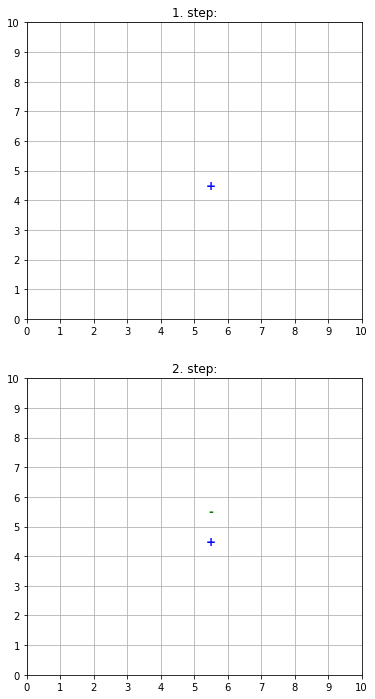

In [111]:
paper = solvers.PaperWithNumbers(10)
x, y = (5,5)
paper.print_symbol(solvers.SIGN_ADD, x,y)
paper.make_step()
x,y = paper.move_down(x,y,-1)
paper.print_symbol(solvers.SIGN_SUB, x,y)
paper.make_step()
plot_steps(paper.get_steps())

## Generator

In [112]:
def generator(Solver_, Problem_, N=10):
    problem_generator = Problem_().generator()
    solver = Solver_(GRID_SIZE)
    iterator = iter(solver.generator(problem_generator))
    solutions = []
    for i in range(N):
        solutions.append(next(iterator))
    return solutions

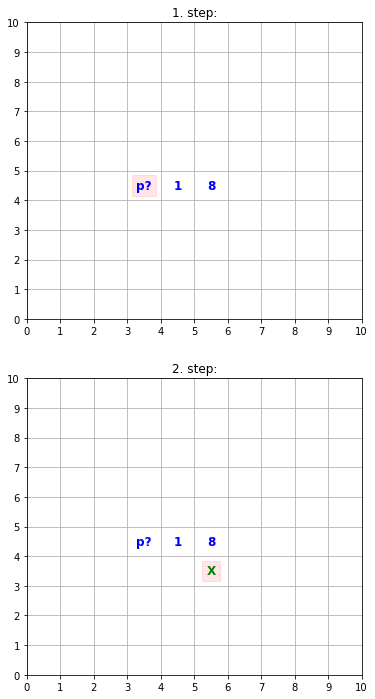

In [113]:
plot_steps(generator(Solver_=IsPrimeSolverEasy,
         Problem_=IsPrimeProblem, N=1)[0])

## Add solver example with visualization

piros színnel jelölve az attention, zöld színnel az adott lépésben változó mezők

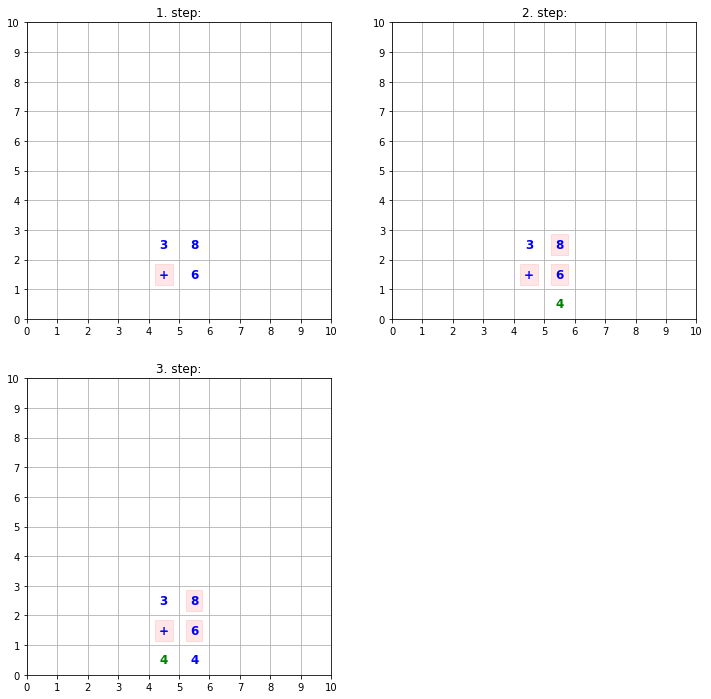

In [114]:
def add_solver_example():
    add_solutions = generator(Solver_=AddSolver,
                              Problem_=HardAdditionProblem,
                             N=1)
    plot_steps(add_solutions[-1], ncols=2)
add_solver_example()

## Is Prime (hard)

<=23 számokra "emlékezetből": nincsenek mellékszámítások.

ennél nagyobb számokra: ellenőrizzük sqrt(n)-ig az osztókat

In [115]:
def prime_generator(prime):
    while True:
        yield {'a': prime}

In [116]:
def solve_prime(n):
    res = next(iter(IsPrimeSolverHard(15).generator(prime_generator(n))))
    plot_steps(res)

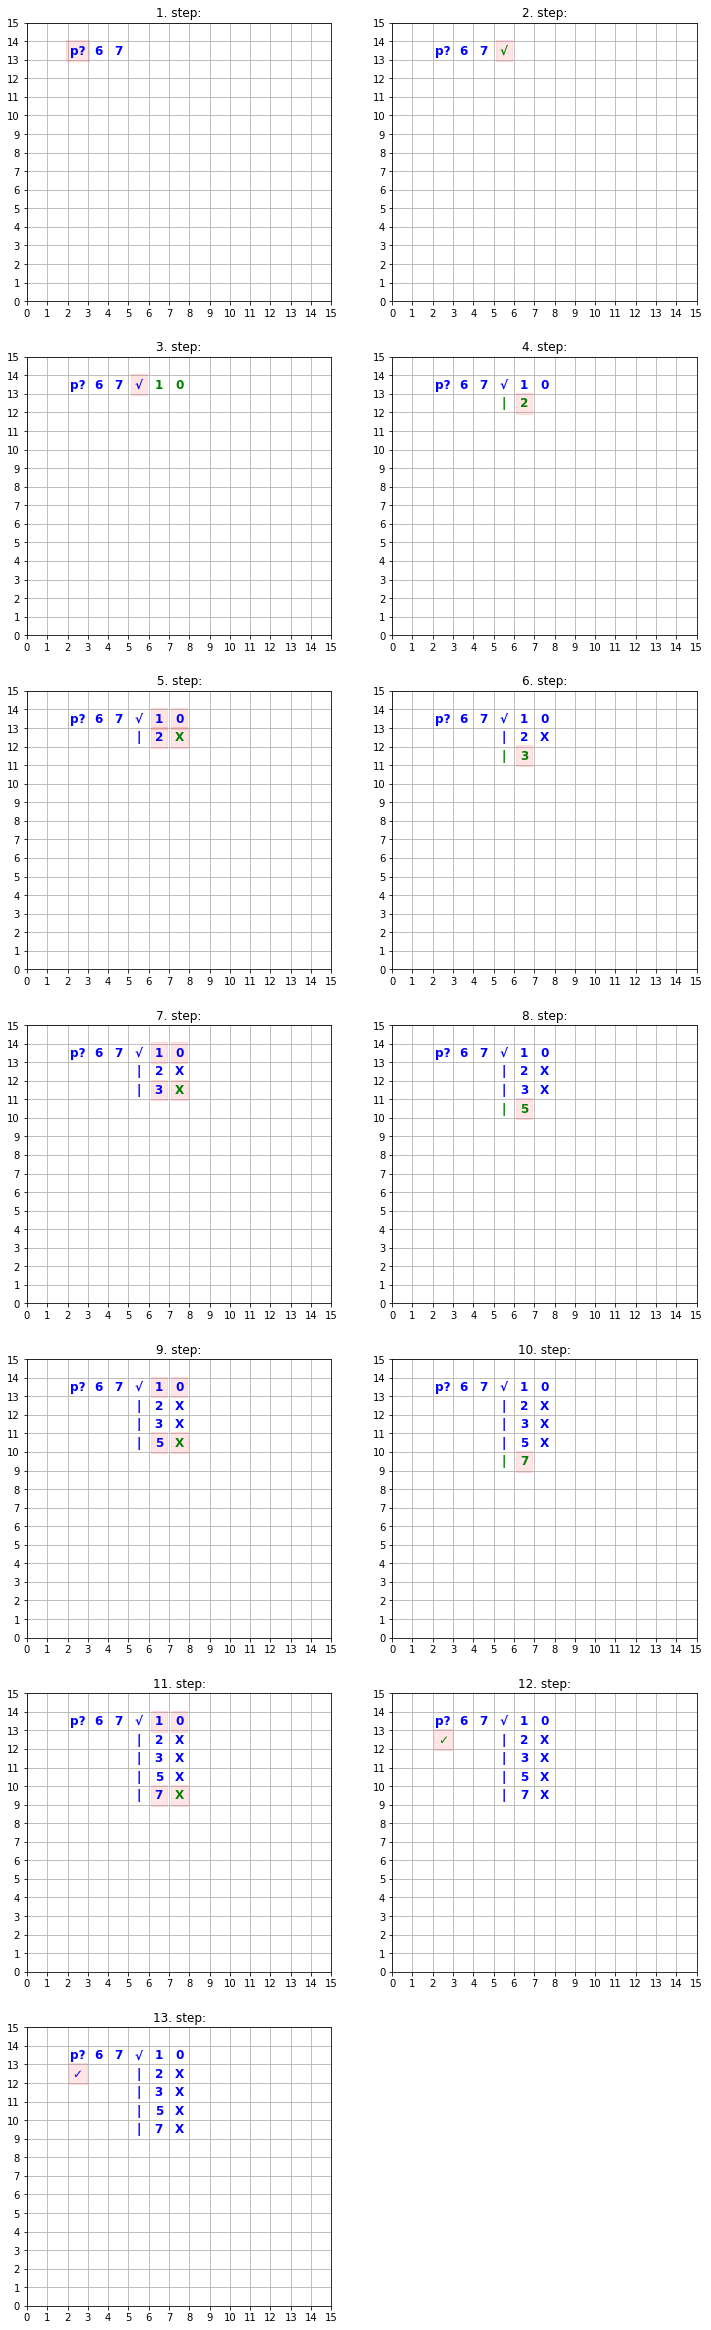

In [117]:
solve_prime(67)

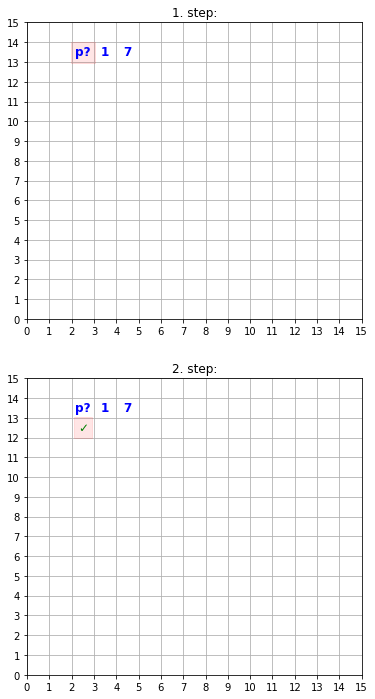

In [118]:
solve_prime(17)

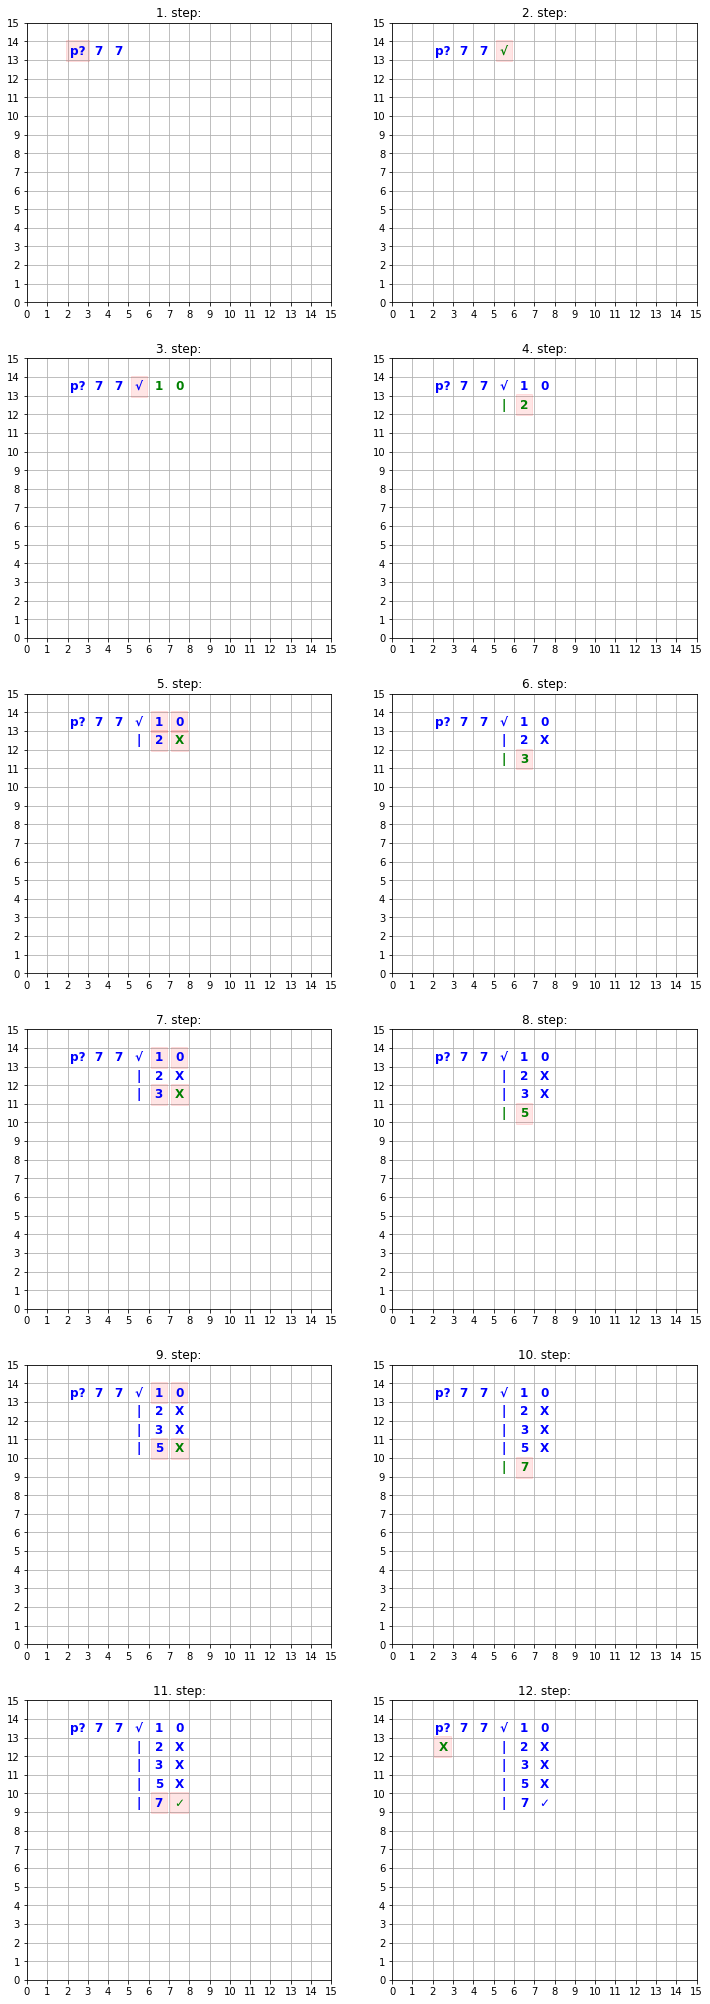

In [119]:
solve_prime(77)

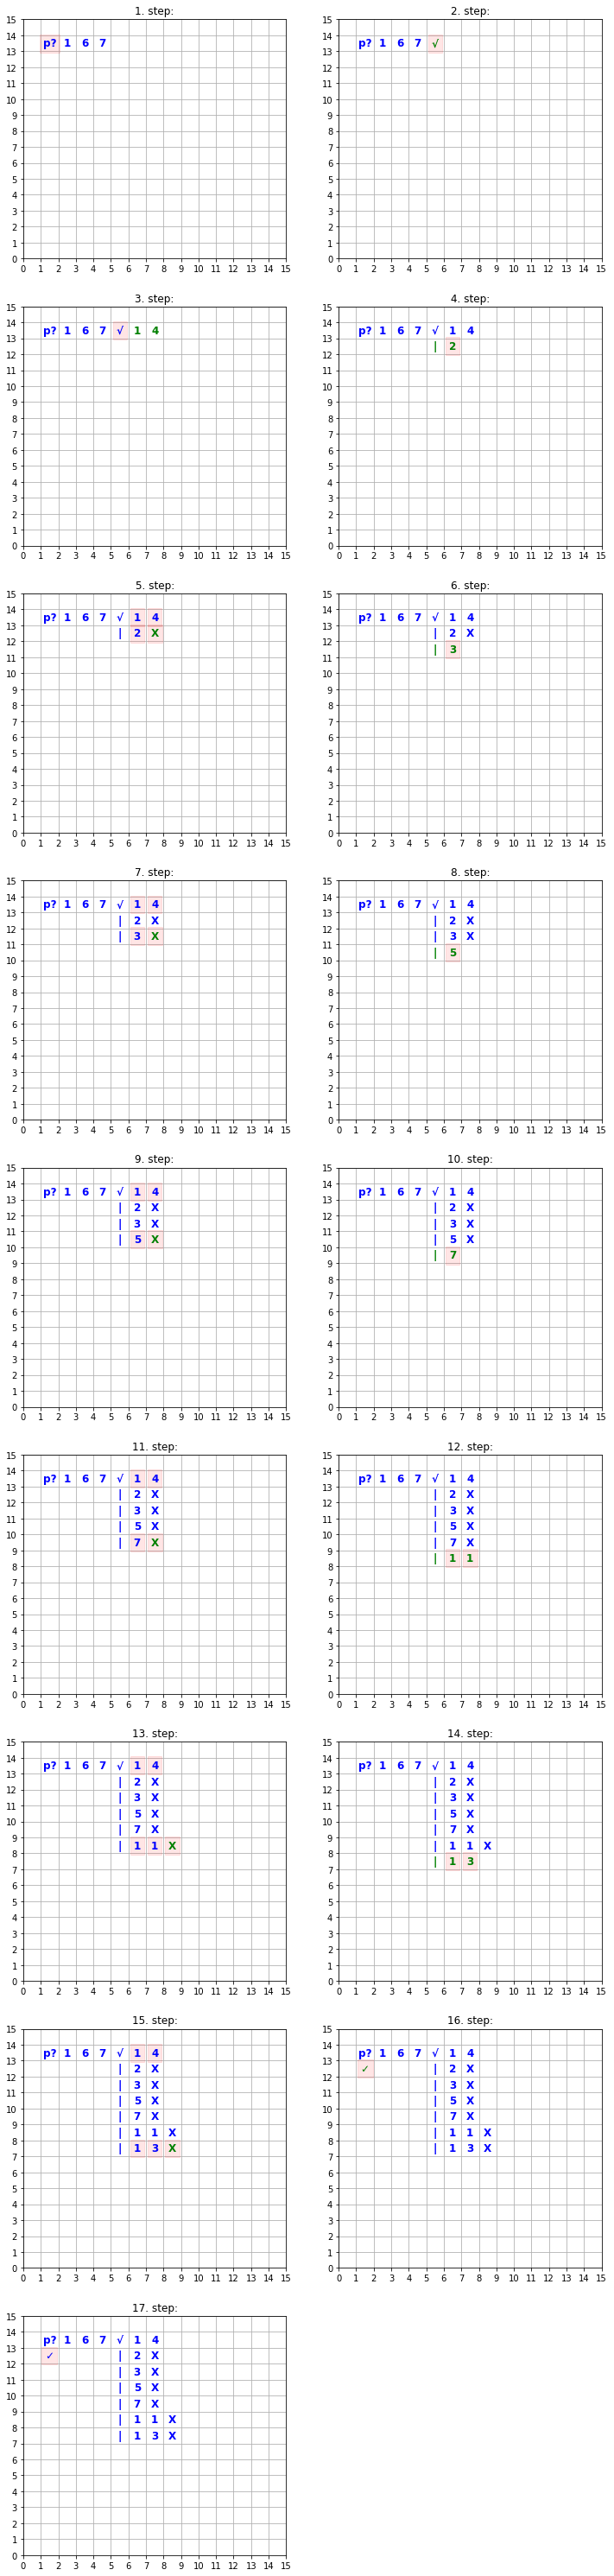

In [120]:
solve_prime(167)

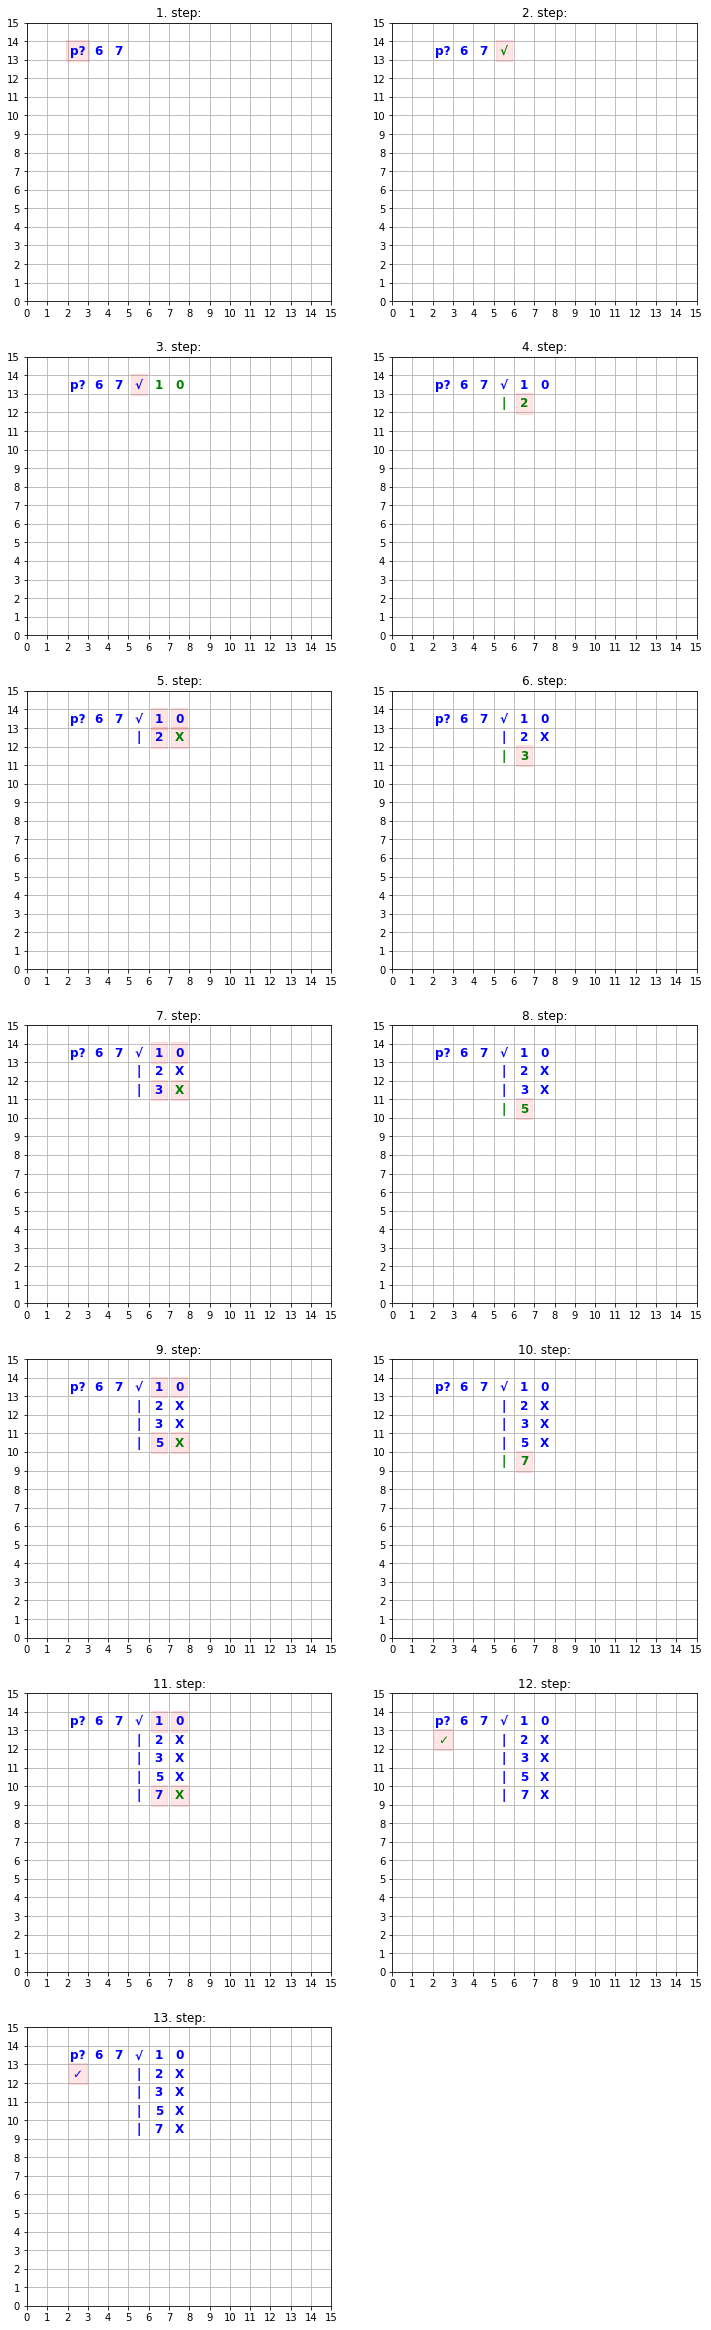

In [121]:
solve_prime(67)

# Base conversion solver

In [134]:
def bc_problem_generator(n, b1=2):
    while True:
        yield {'n': n, 'b1': b1, 'b2': 10}

In [135]:
def solve_base_conversion(n, b1):
    res = next(iter(BaseConversionSolver(15).generator(bc_problem_generator(n, b1))))
    plot_steps(res)


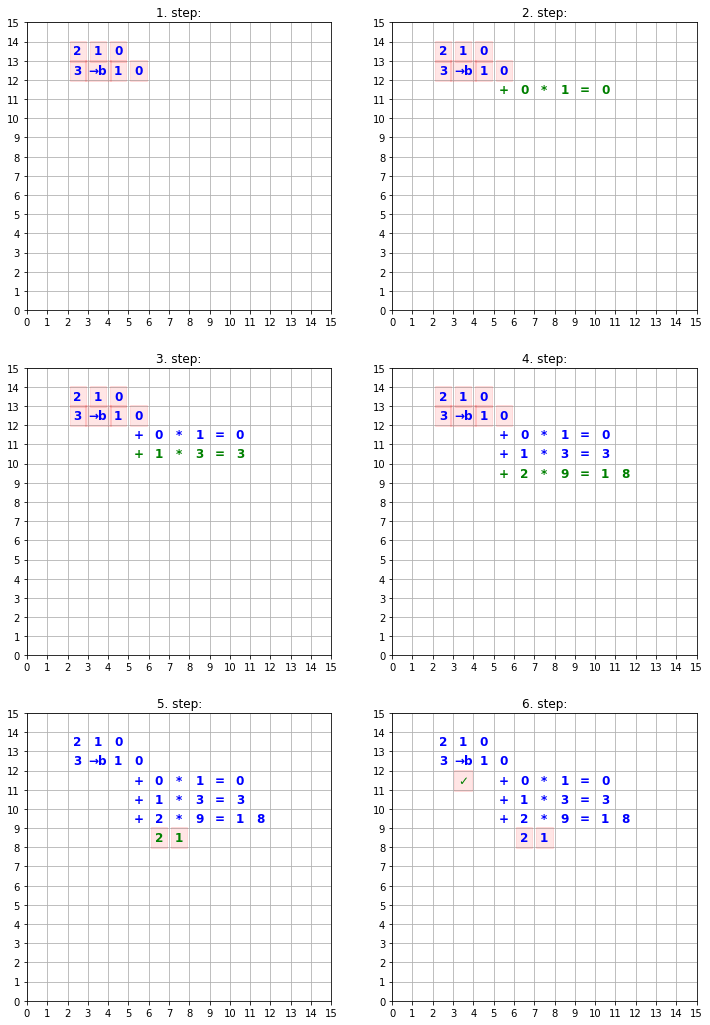

In [141]:
solve_base_conversion(21, 3)

## Add solver example with visualization

piros színnel jelölve az attention, zöld színnel az adott lépésben változó mezők

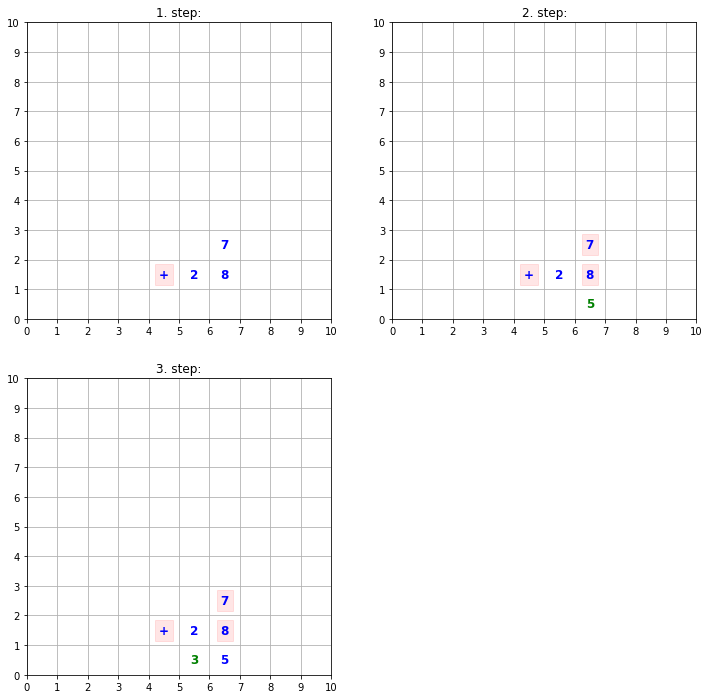

In [125]:
def add_solver_example():
    add_solutions = generator(Solver_=AddSolver,
                              Problem_=HardAdditionProblem,
                             N=1)
    plot_steps(add_solutions[-1], ncols=2)
add_solver_example()